@version July 2025
@author Brian Keller
This notebook is for visualizing data from various stages in the static optimization pipeline of the Old Young walking data. 

# Imports and Setup

In [2]:
import opensim as osim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot sample GRF from raw forces data

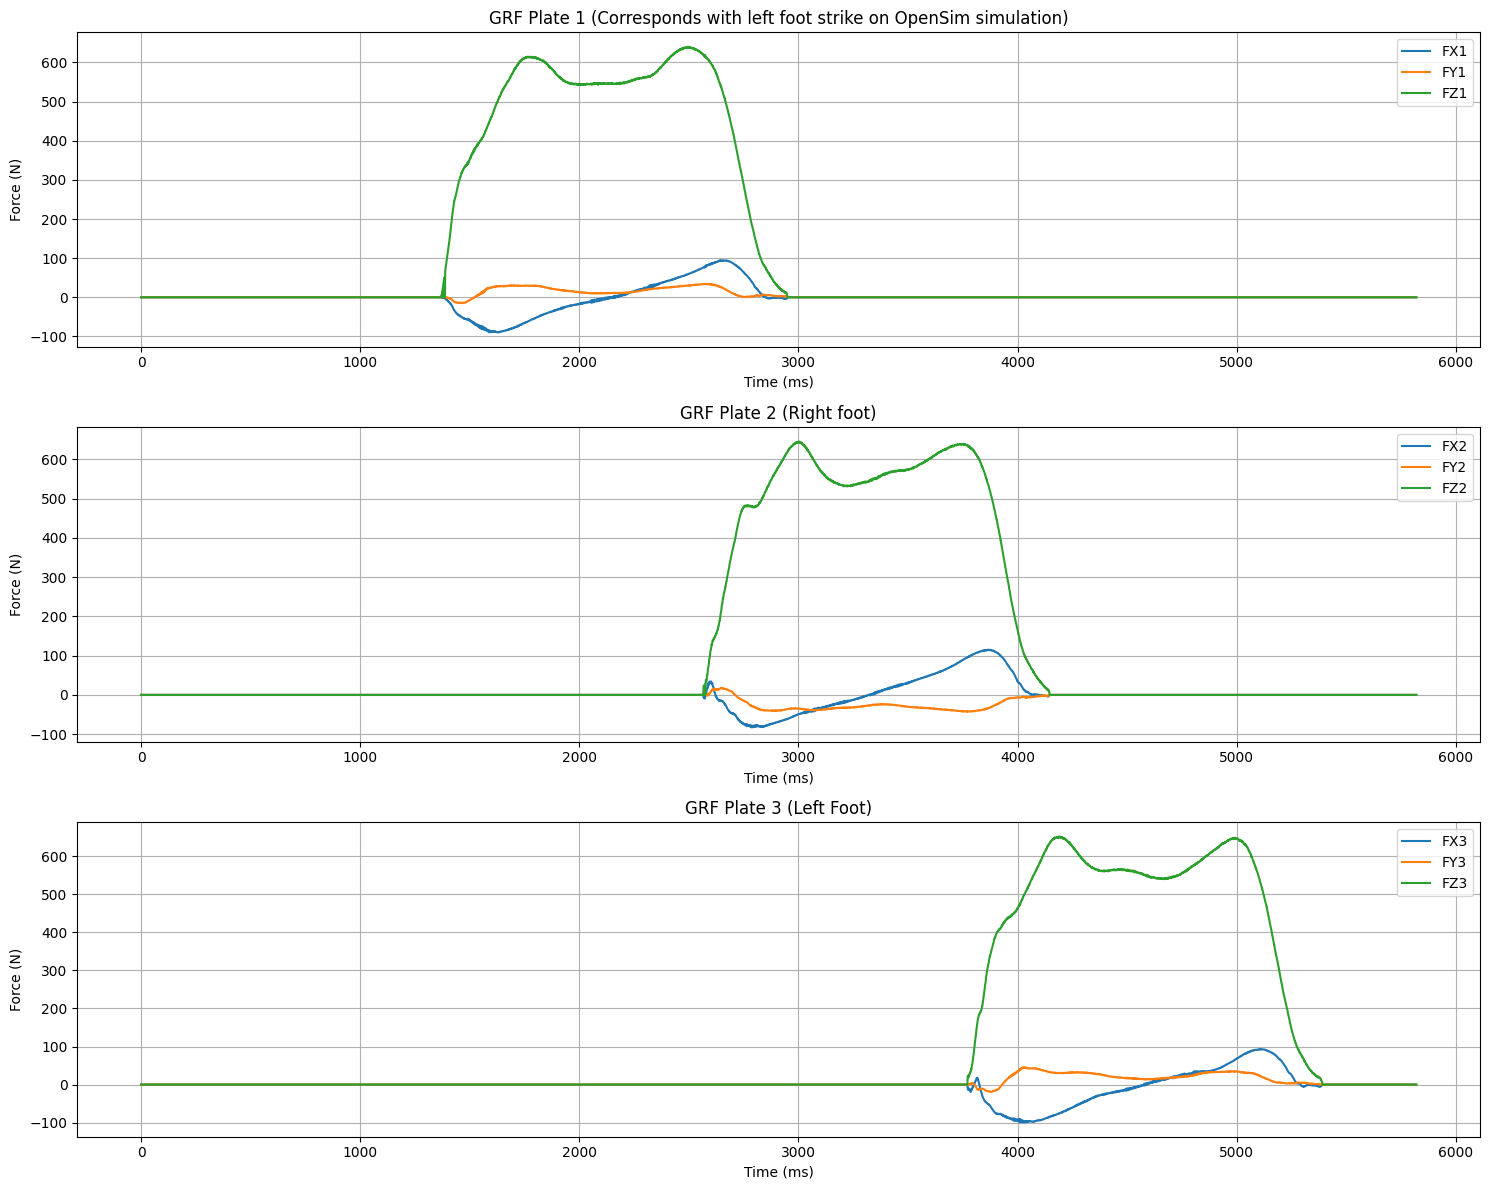

In [22]:
forces_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/Files_W_HJCs/OA1_80_1.forces"
with open(forces_file, 'r') as f:
    lines = f.readlines()
    header_line = lines[4].strip().lstrip('#').split('\t')

# Now load the DataFrame using the cleaned header
raw_df = pd.read_csv(forces_file, sep='\t', skiprows=5, names=header_line)

# If the first column is not time, add a synthetic one
if 'time' not in raw_df.columns[0].lower():
    raw_df.insert(0, 'time', range(len(raw_df)))

# Set up plotting
plt.figure(figsize=(15, 12))

# Plot forces from plate 1 (assumed Right)
plt.subplot(3, 1, 1)
plt.plot(raw_df['time'], raw_df['FX1'], label='FX1')
plt.plot(raw_df['time'], raw_df['FY1'], label='FY1')
plt.plot(raw_df['time'], raw_df['FZ1'], label='FZ1')
plt.title('GRF Plate 1 (Corresponds with left foot strike on OpenSim simulation)')
plt.xlabel('Time (ms)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

# Plot forces from plate 2 (assumed Left)
plt.subplot(3, 1, 2)
plt.plot(raw_df['time'], raw_df['FX2'], label='FX2')
plt.plot(raw_df['time'], raw_df['FY2'], label='FY2')
plt.plot(raw_df['time'], raw_df['FZ2'], label='FZ2')
plt.title('GRF Plate 2 (Right foot)')
plt.xlabel('Time (ms)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(raw_df['time'], raw_df['FX3'], label='FX3')
plt.plot(raw_df['time'], raw_df['FY3'], label='FY3')
plt.plot(raw_df['time'], raw_df['FZ3'], label='FZ3')
plt.title('GRF Plate 3 (Left Foot)')
plt.xlabel('Time (ms)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot sample GRF's from old dataset

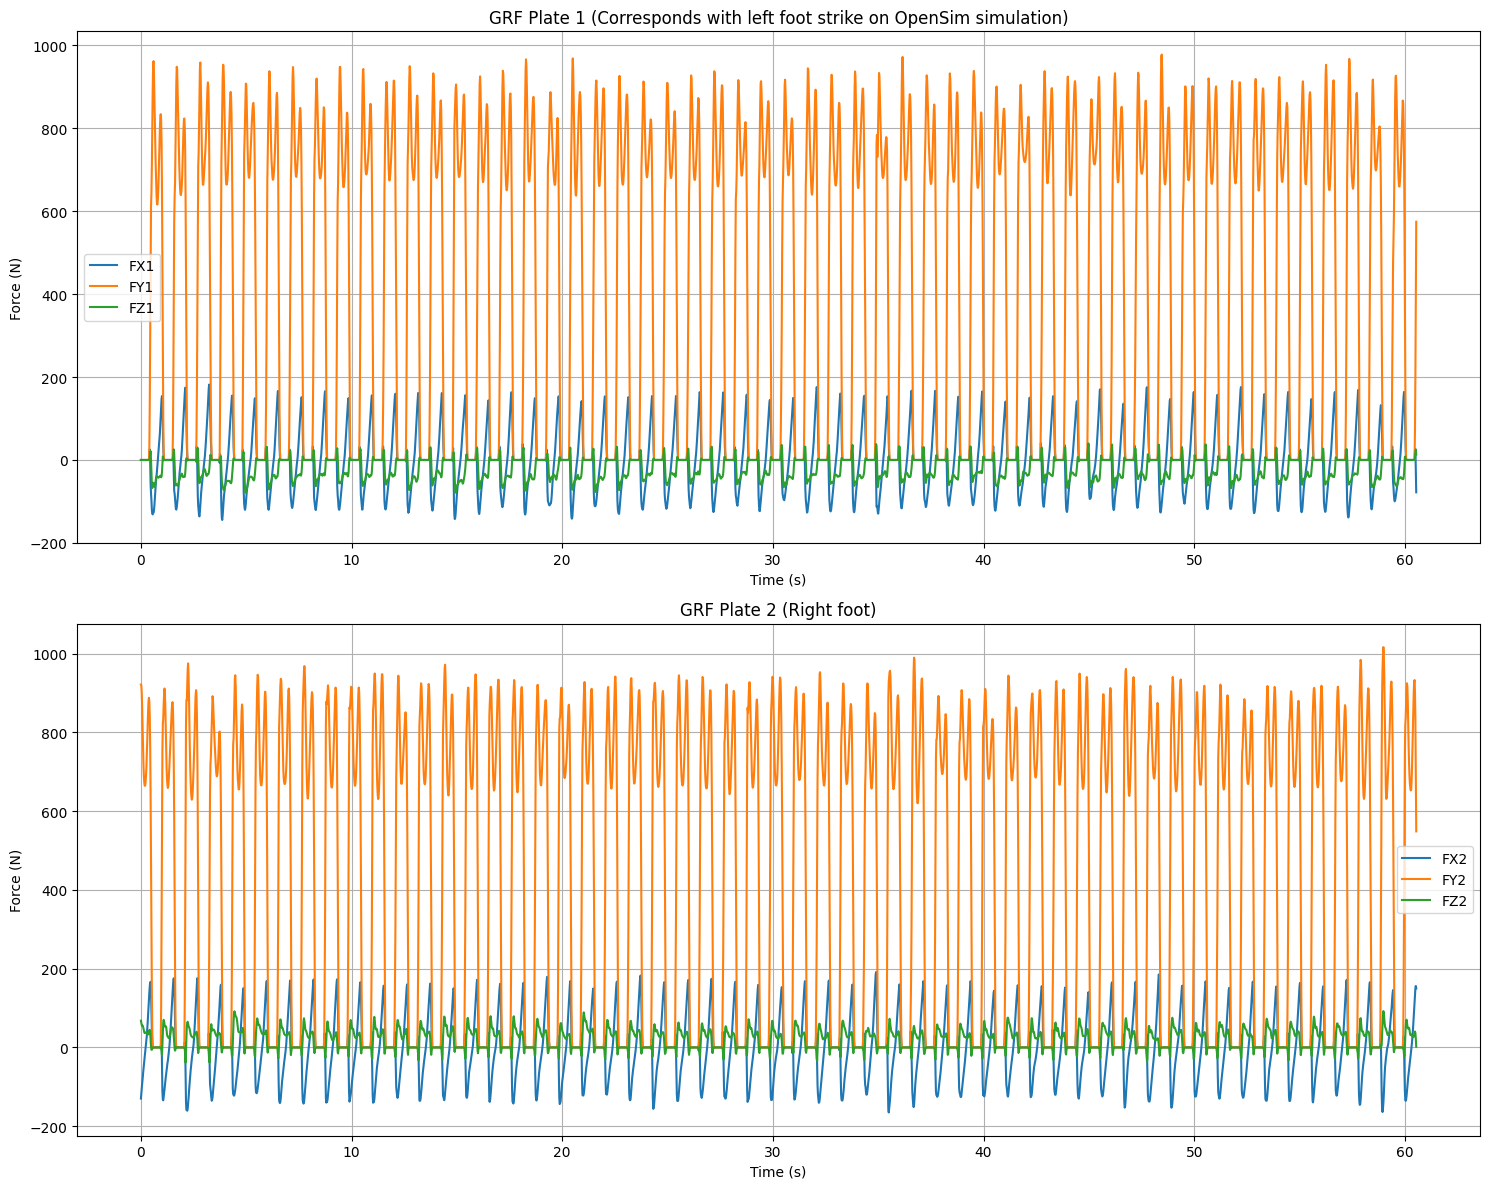

In [ ]:
grf_file = "/Users/briankeller/Desktop/GRFMuscleModel/data/Subject1/ExpmtlData/GRF/walking_baseline1_forces.mot"
with open(grf_file, 'r') as f:
    lines = f.readlines()
    header_line = lines[6].strip().lstrip('#').split('\t')

# Now load the DataFrame using the cleaned header
walking_baseline_df = pd.read_csv(grf_file, sep='\t', skiprows=7, names=header_line)

# If the first column is not time, add a synthetic one
if 'time' not in walking_baseline_df.columns[0].lower():
    walking_baseline_df.insert(0, 'time', range(len(walking_baseline_df)))

# Set up plotting
plt.figure(figsize=(15, 12))

# Plot forces from plate 1 (assumed Right)
plt.subplot(2, 1, 1)
plt.plot(walking_baseline_df['time'], walking_baseline_df['ground_force_vx'], label='FX1')
plt.plot(walking_baseline_df['time'], walking_baseline_df['ground_force_vy'], label='FY1')
plt.plot(walking_baseline_df['time'], walking_baseline_df['ground_force_vz'], label='FZ1')
plt.title('GRF from treadmill trial')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

# Plot forces from plate 2 (assumed Left)
plt.subplot(2, 1, 2)
plt.plot(walking_baseline_df['time'], walking_baseline_df['1_ground_force_vx'], label='FX2')
plt.plot(walking_baseline_df['time'], walking_baseline_df['1_ground_force_vy'], label='FY2')
plt.plot(walking_baseline_df['time'], walking_baseline_df['1_ground_force_vz'], label='FZ2')
plt.title('GRF also from treadmill trial')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Plot ankle/subtalar angles over time for IK sample trial


   time  hip_flexion_r  knee_angle_r  ankle_angle_r  pelvis_tilt  pelvis_list  \
0  0.00     -17.554889      4.882708      23.023148    40.938581    85.351455   
1  0.01     -18.397897      4.636044      24.239603    41.718743    85.466846   
2  0.02     -18.983785      4.847318      24.330143    41.669100    85.500825   
3  0.03     -19.474971      5.006157      24.401236    41.599791    85.697475   
4  0.04     -19.878317      5.591377      24.812133    41.917410    85.818866   

   pelvis_tz  
0   0.954917  
1   0.952850  
2   0.950722  
3   0.948779  
4   0.946836  


/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/2265370286.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ik_df = pd.read_csv(ik_file, delim_whitespace=True, skiprows=10)


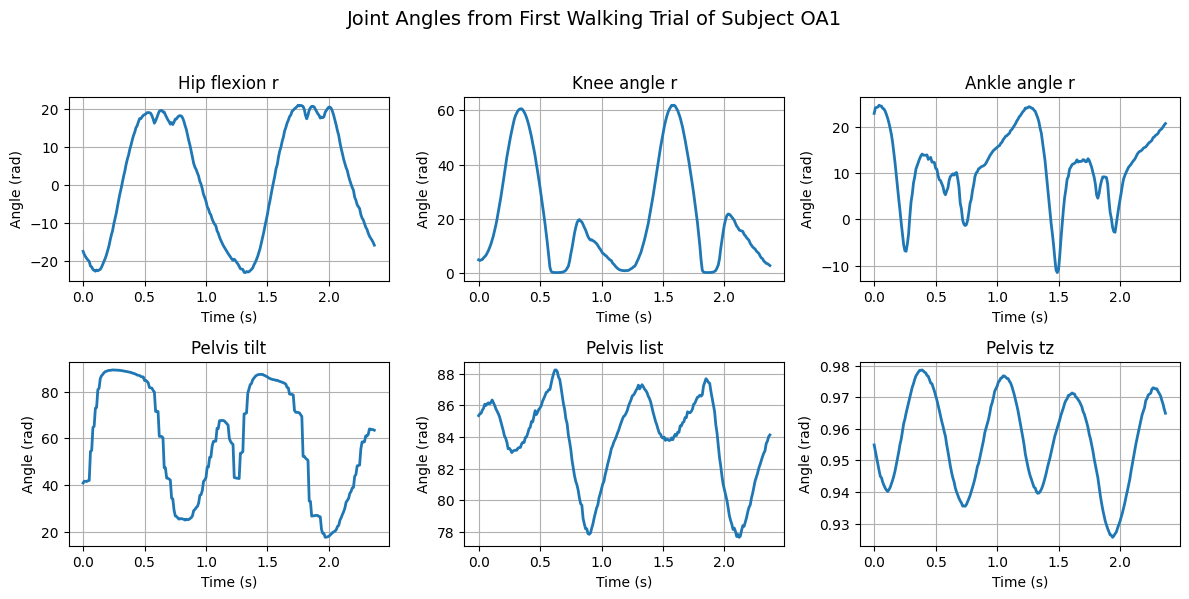

In [58]:
ik_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/IK/ik_output_walk.mot"
joint_names = ['hip_flexion_r', 'knee_angle_r', 'ankle_angle_r', 'pelvis_tilt', 'pelvis_list', 'pelvis_tz']
ik_df = pd.read_csv(ik_file, delim_whitespace=True, skiprows=10)
#extract relevant columns
kept_cols = ['time'] + joint_names
ik_df = ik_df[kept_cols]
print(ik_df.head())
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(joint_names):
    if name in ik_df.columns:
        ax = axs[i]
        ax.plot(ik_df['time'], ik_df[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (rad)')
        ax.grid(True)
for j in range(len(joint_names), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Joint Angles from First Walking Trial of Subject OA1', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


# Plot Joint Angles from Tony's data

   time  hip_flexion_r  knee_angle_r  ankle_angle_r  pelvis_tilt  pelvis_list  \
0  0.00      -0.750073     46.139678     -21.119279    -2.638042     0.388408   
1  0.02       3.596118     52.363483     -21.991248    -2.820187     0.685185   
2  0.04       7.296779     57.035299     -19.406465    -2.870961     0.748312   
3  0.06      10.287915     60.050640     -17.386958    -2.650655     0.446478   
4  0.08      13.141624     61.803208     -15.962368    -2.547375    -0.015656   

   pelvis_tz  
0  -0.552679  
1  -0.553491  
2  -0.554799  
3  -0.556410  
4  -0.558175  


/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/2297834117.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Tik_df = pd.read_csv(Tik_file, delim_whitespace=True, skiprows=10)


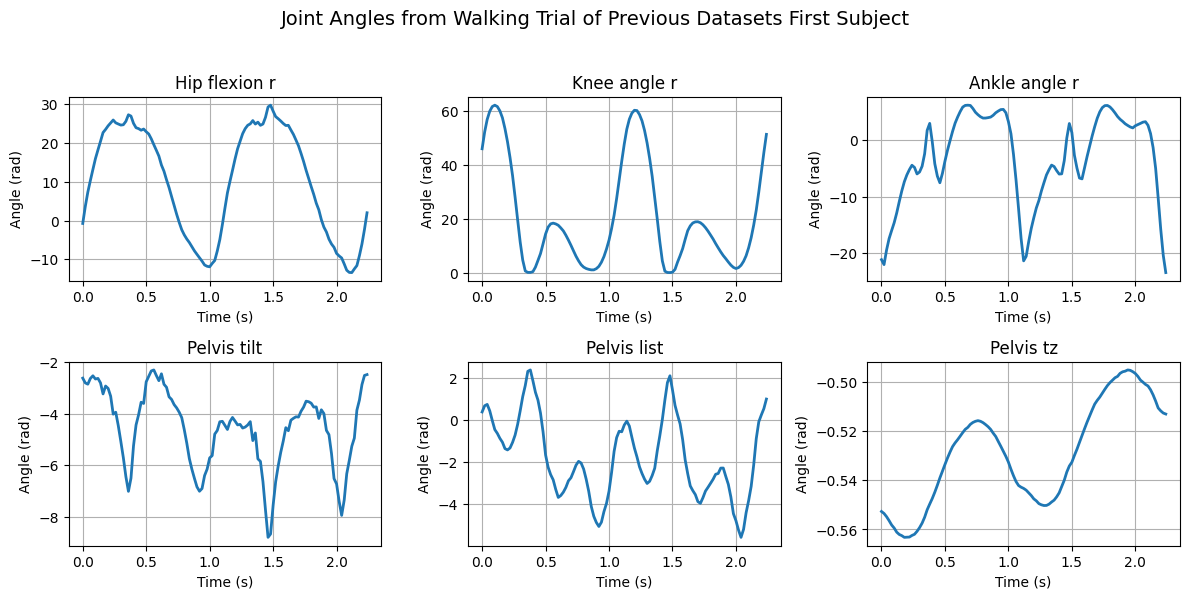

In [ ]:
Tik_file = "/Users/briankeller/Desktop/GRFMuscleModel/data/Subject1/IK/walking_baseline1/output/results_ik.sto"
Tik_df = pd.read_csv(Tik_file, delim_whitespace=True, skiprows=10)
Tik_df.columns = Tik_df.columns.str.strip()
Tik_df = Tik_df[[col for col in kept_cols if col in Tik_df.columns]]
#trim down to similar time chunk
Tik_df_subset = Tik_df[(Tik_df['time'] >= 0) & (Tik_df['time'] <= 2.25)]
print(Tik_df.head())
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(joint_names):
    if name in Tik_df_subset.columns:
        ax = axs[i]
        ax.plot(Tik_df_subset['time'], Tik_df_subset[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (rad)')
        ax.grid(True)
for j in range(len(joint_names), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Joint Angles from Baseline Walking Trial of Ulrich Datasets First Subject', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


# Plot Inverse Dynamics Results from OA1 

   time  hip_flexion_r_moment  knee_angle_r_moment  ankle_angle_r_moment  \
0  0.00             -0.692390             1.808306             -0.031777   
1  0.01              7.196305            -0.141291             -0.100269   
2  0.02             13.201547            -1.476917             -0.160609   
3  0.03             17.031136            -2.130679             -0.208197   
4  0.04             18.807353            -2.158975             -0.243040   

   pelvis_tilt_moment  pelvis_list_moment  pelvis_tz_force  
0          -36.520237            5.597775        13.092454  
1          -39.026889           -3.307286        20.152380  
2          -41.257392           -8.129369        29.058560  
3          -42.995116           -7.485861        41.663296  
4          -44.155502           -0.821224        59.125385  


/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/2522719325.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  id_df = pd.read_csv(id_file, delim_whitespace=True, skiprows=6)


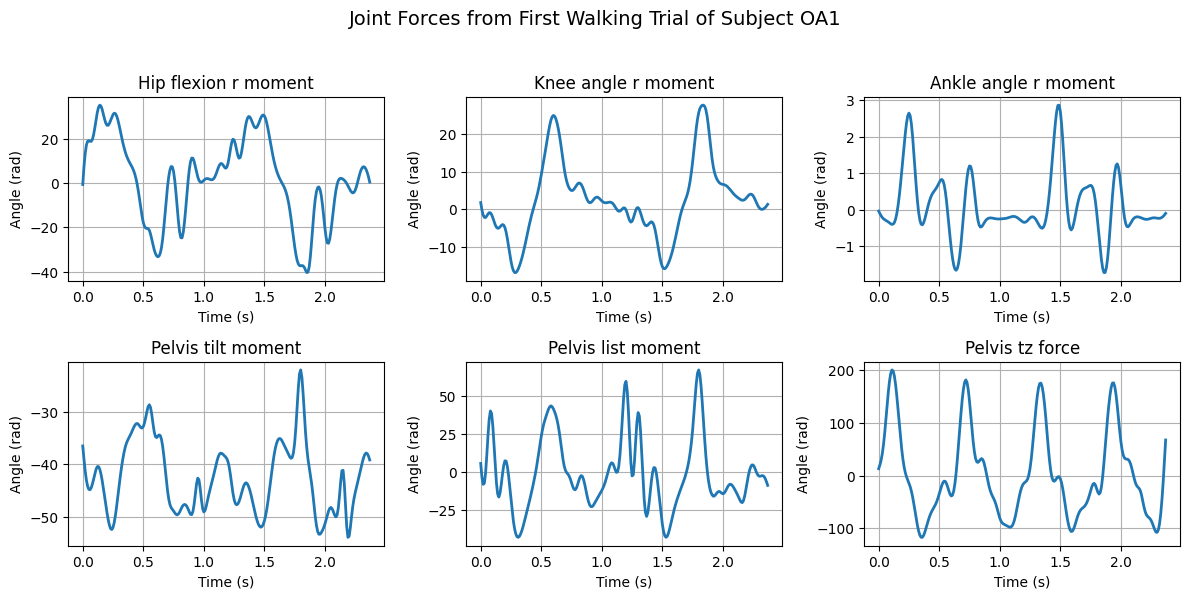

In [75]:
id_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/ID/results_id.sto"
joint_forces = ['hip_flexion_r_moment', 'knee_angle_r_moment', 'ankle_angle_r_moment', 'pelvis_tilt_moment', 'pelvis_list_moment', 'pelvis_tz_force']
id_df = pd.read_csv(id_file, delim_whitespace=True, skiprows=6)
#extract relevant columns
kept_cols = ['time'] + joint_forces
id_df = id_df[kept_cols]
print(id_df.head())
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(joint_forces):
    if name in id_df.columns:
        ax = axs[i]
        ax.plot(id_df['time'], id_df[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (rad)')
        ax.grid(True)
for j in range(len(joint_forces), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Joint Forces from First Walking Trial of Subject OA1', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Plot Inverse Dynamics Results from Ulrich's first subject 

   time  hip_flexion_r_moment  knee_angle_r_moment  ankle_angle_r_moment  \
0 -0.00            -21.438599            19.370035              0.451323   
1  0.02             -1.537124             6.792080              1.363779   
2  0.04             12.059265            -3.531926              1.860579   
3  0.06             17.273675            -9.024670              1.939985   
4  0.08             16.113996            -9.653898              1.780826   

   pelvis_tilt_moment  pelvis_list_moment  pelvis_tz_force  
0          -32.326273           -8.307399       -63.649755  
1          -14.491500           -7.695151       -30.923841  
2            1.449668           -2.720237        -8.339776  
3            5.025930            3.515139         3.505027  
4            0.193258           10.025233         6.990382  


/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/2379346177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Uid_df = pd.read_csv(Uid_file, delim_whitespace=True, skiprows=6)


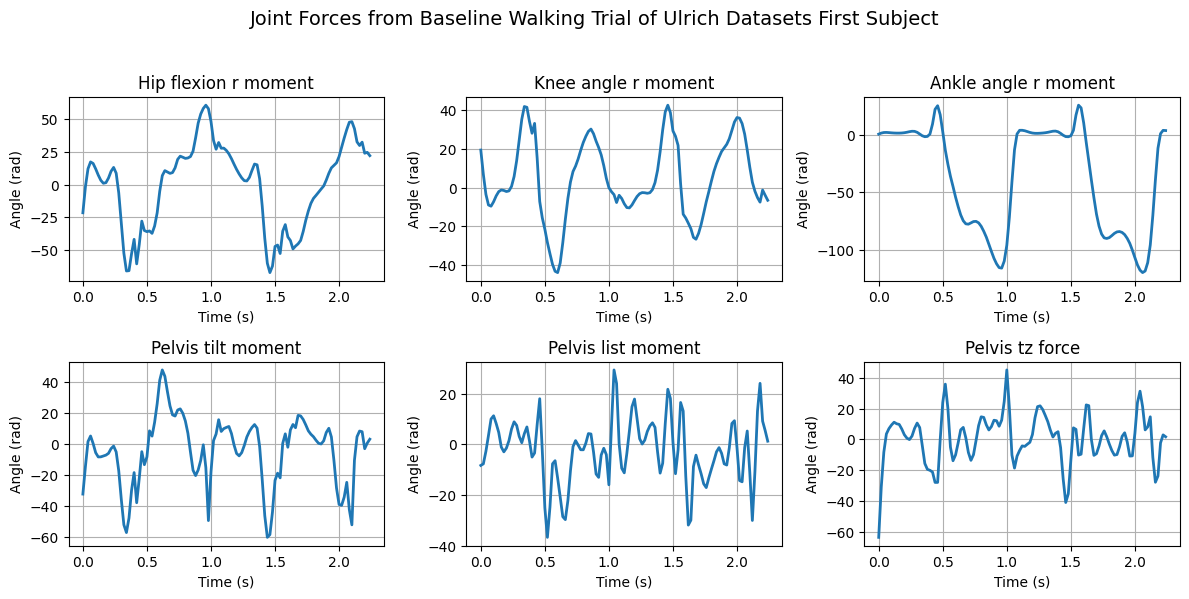

In [78]:
Uid_file = "/Users/briankeller/Desktop/GRFMuscleModel/data/Subject1/ID/walking_baseline1/output/results_id.sto"
Uid_df = pd.read_csv(Uid_file, delim_whitespace=True, skiprows=6)
Uid_df.columns = Uid_df.columns.str.strip()
Uid_df = Uid_df[[col for col in kept_cols if col in Uid_df.columns]]
#trim down to similar time chunk
Uid_df_subset = Uid_df[(Uid_df['time'] >= 0) & (Uid_df['time'] <= 2.25)]
print(Uid_df.head())
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(joint_forces):
    if name in Uid_df_subset.columns:
        ax = axs[i]
        ax.plot(Uid_df_subset['time'], Uid_df_subset[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (rad)')
        ax.grid(True)
for j in range(len(joint_forces), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Joint Forces from Baseline Walking Trial of Ulrich Datasets First Subject', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Plot muscle forces from OA1 Static Optimization

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/2828877655.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  OA1_force_df = pd.read_csv(OA1_force_file, delim_whitespace=True, skiprows=14)


    tibpost_r    tibant_r       edl_r       ehl_r       fdl_r       fhl_r  \
0   48.497327  776.197424  426.575965  208.986005   12.482843   27.443939   
1   27.773483  787.403414  433.386210  212.428947    7.045445   15.707231   
2  266.015396  571.824157  215.861307  100.287738   82.533009  146.457685   
3   64.410259  127.746482   52.713005   23.526988   17.954420   33.500048   
4  277.126685  386.128137  177.733058   64.680651  143.367220  171.194660   

    perbrev_r   perlong_r   gaslat_r     gasmed_r    soleus_r  time  
0   14.731684   30.670693  23.995097  1446.264401   96.953678  0.00  
1    8.336985   17.533244  14.115458  1531.328938   61.983436  0.01  
2   94.497110  171.249434  87.157028   556.054872  261.994219  0.11  
3   22.969418   45.002217  16.300120    24.378957   78.235060  0.21  
4  168.937665  227.221021  97.036775   123.339940  148.638403  0.31  


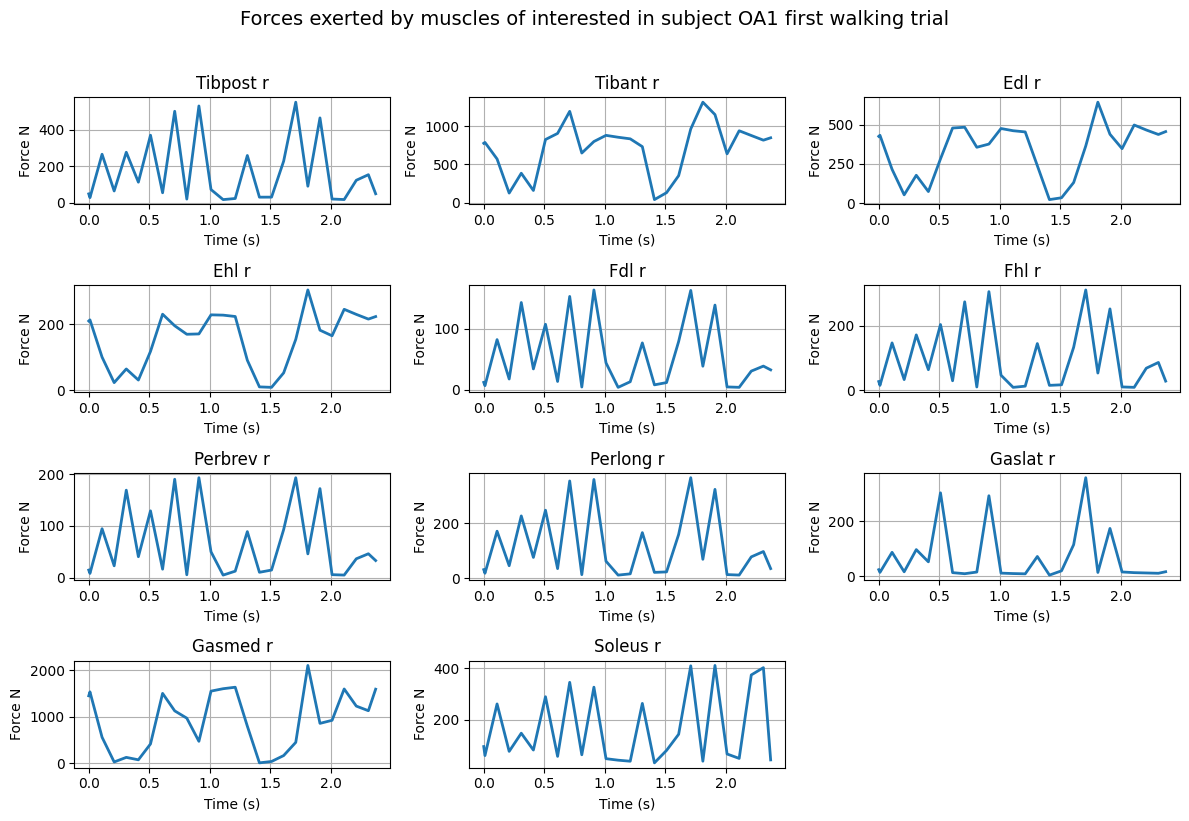

In [79]:
target_muscles = ['tibpost_r', 'tibant_r', 'edl_r', 'ehl_r', 'fdl_r', 'fhl_r',
    'perbrev_r', 'perlong_r',
    'gaslat_r', 'gasmed_r', 'soleus_r'  # using soleus for Achilles
]
OA1_force_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/SO/Scaled_Model_StaticOptimization_force.sto"
OA1_force_df = pd.read_csv(OA1_force_file, delim_whitespace=True, skiprows=14)
OA1_force_df.columns = OA1_force_df.columns.str.strip()
kept_cols = target_muscles + ['time']
OA1_force_df = OA1_force_df[[col for col in kept_cols if col in OA1_force_df.columns]]
print(OA1_force_df.head())
rows = 4
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(target_muscles):
    if name in OA1_force_df.columns:
        ax = axs[i]
        ax.plot(OA1_force_df['time'], OA1_force_df[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Force N')
        ax.grid(True)
for j in range(len(target_muscles), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Forces exerted by muscles of interested in subject OA1 first walking trial', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Plot muscle forces from Ulrich dataset's first subject walking baseline

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/3235145622.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject1_df = pd.read_csv(subject1_file, delim_whitespace=True, skiprows=14)


   tibpost_r   tibant_r      edl_r     ehl_r     fdl_r     fhl_r  perbrev_r  \
0  68.389686  12.397572  11.472390  7.745279  4.122027  8.409592   6.521201   
1  73.865091  35.770977  24.465319  7.505908  4.157042  8.484339  11.058979   
2  79.663660  44.000671  29.369995  7.424272  4.508520  8.561723  12.581208   
3  85.782672  45.344563  30.267735  6.845415  5.205299  8.639577  12.930912   
4  92.103960  42.712750  29.618000  6.023974  6.002617  8.705557  13.155902   

   perlong_r   gaslat_r   gasmed_r   soleus_r  time  
0  38.493631  12.723214  23.142447  48.461643  0.00  
1  55.565246  12.364733  21.417742  49.306739  0.02  
2  59.818855  12.065479  20.000379  50.353944  0.04  
3  60.101757  11.950629  19.373526  51.640740  0.06  
4  60.506865  12.072490  19.641582  53.083260  0.08  


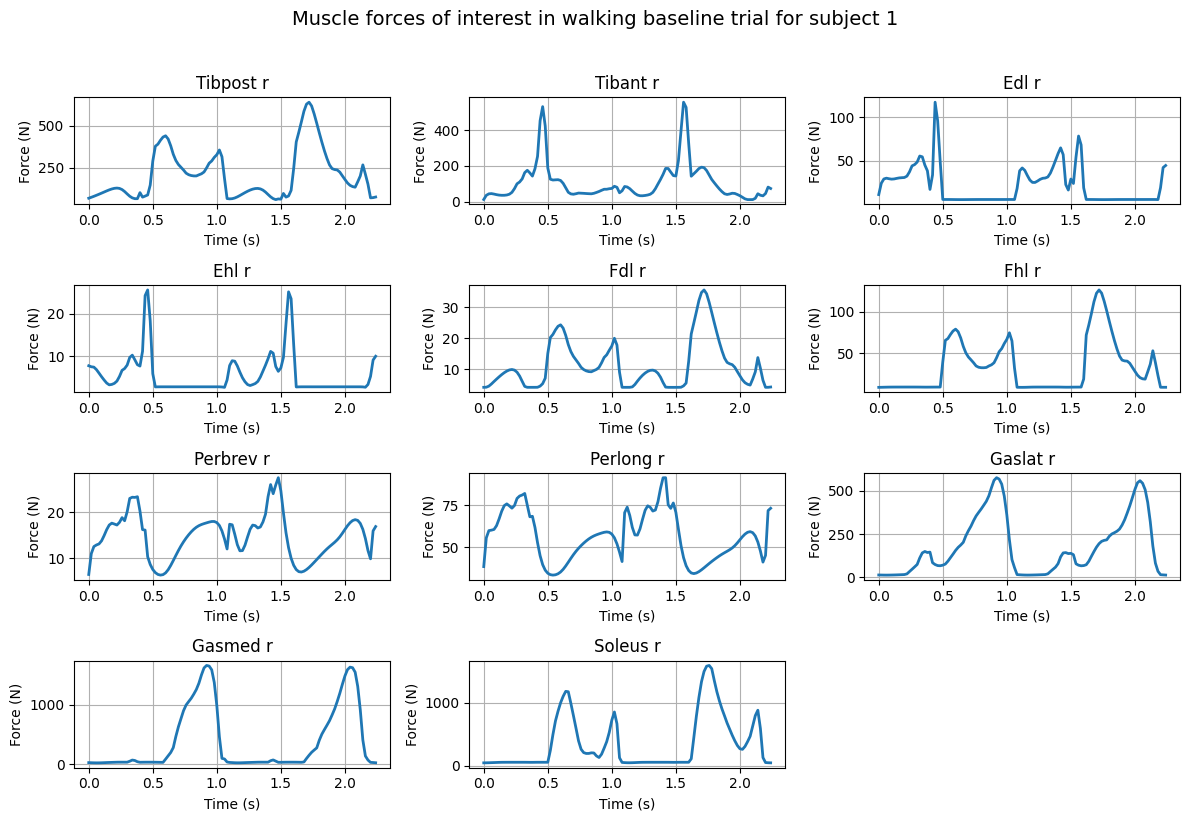

In [72]:
subject1_file = "/Users/briankeller/Desktop/GRFMuscleModel/data/Subject1/StaticOpt/walking_baseline1/results_forces.sto"
subject1_df = pd.read_csv(subject1_file, delim_whitespace=True, skiprows=14)
subject1_df.columns = subject1_df.columns.str.strip()
subject1_df = subject1_df[[col for col in kept_cols if col in subject1_df.columns]]
#trim down to similar time chunk
subject1_df_subset = subject1_df[(subject1_df['time'] >= 0) & (subject1_df['time'] <= 2.25)]
print(subject1_df.head())
rows = 4
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(target_muscles):
    if name in subject1_df_subset.columns:
        ax = axs[i]
        ax.plot(subject1_df_subset['time'], subject1_df_subset[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Force (N)')
        ax.grid(True)
for j in range(len(target_muscles), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Muscle forces of interest in walking baseline trial for subject 1', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()